<a href="https://colab.research.google.com/github/edmartins-br/ConsumingAlphaVantageAPI/blob/main/AlphaVantage_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 7.5MB/s 
     |████████████████████████████████| 143kB 35.5MB/s 
     |████████████████████████████████| 296kB 37.5MB/s 


In [ ]:
pip install matplotlib

In [8]:
pip install pysqlite3

In [ ]:
pip install pandas

CARREGANDO DADOS...


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


DADOS CARREGADOS DE B3SA3:
                   date  1. open  2. high  3. low  4. close   5. volume
0   2021-05-10 00:00:00    52.82    53.58   52.45     53.30  10901300.0
1   2021-05-07 00:00:00    51.45    53.56   51.41     53.34  20388600.0
2   2021-05-06 00:00:00    51.50    51.54   50.12     50.80  22305600.0
3   2021-05-05 00:00:00   152.40   155.46  151.89    154.50   9146800.0
4   2021-05-04 00:00:00   154.65   155.13  151.05    152.01   9886700.0
..                  ...      ...      ...     ...       ...         ...
95  2020-12-15 00:00:00   175.08   177.69  173.91    176.64   9579700.0
96  2020-12-14 00:00:00   177.78   178.20  172.86    174.84   7969200.0
97  2020-12-11 00:00:00   174.30   177.51  171.72    176.52  11305800.0
98  2020-12-10 00:00:00   170.52   175.05  164.58    174.63  18219699.0
99  2020-12-09 00:00:00   173.40   174.48  168.84    169.95  16050900.0

[100 rows x 6 columns]
DADOS CARREGADOS DE PETR4:
                   date  1. open  2. high  3. low  4. clos

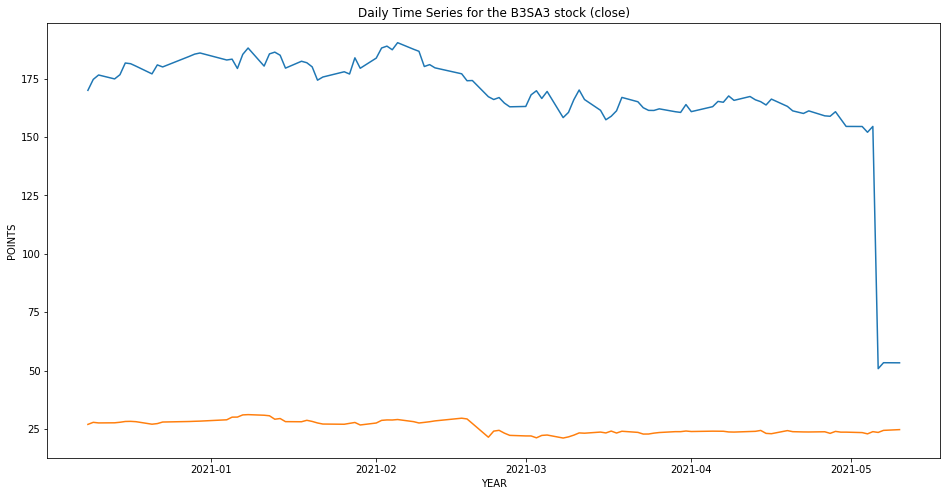

In [ ]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sqlite3
    from alpha_vantage.timeseries import TimeSeries
    import matplotlib
    import json

    #CRIANDO A BASE DE DADOS SQLITE3
    # database="stock.db"
    # conn = sqlite3.connect(database)
    # cursor = conn.cursor()
    # cursor.execute('''CREATE TABLE IF NOT EXISTS stocks 
    #                 (id INTEGER PRIMARY KEY, 
    #                     ticker VARCHAR(10), 
    #                     nome VARCHAR(10), 
    #                     data DATA, 
    #                     ativo VARCHAR(10), 
    #                     preco FLOAT)''')

    matplotlib.rcParams['figure.figsize'] = (16, 8)

    print('CARREGANDO DADOS...')

    # BUSCA A CHAVE DA API ALPHA VANTAGE
    ALPHAVANTAGE_API_KEY = 'QKWVUQ6IISGPG3F8'

    ts = TimeSeries(key = ALPHAVANTAGE_API_KEY, output_format='pandas')

    b3sa3_data, b3sa3_md = ts.get_daily(symbol = ('B3SA3.SAO'), outputsize = 'compact')
    b3sa3_symbol = ts.get_symbol_search('B3SA3.SAO')
    #print('ATIVO: B3SA3', b3sa3_data)

    petr4_data, petr4_md = ts.get_daily(symbol = ('PETR4.SAO'), outputsize = 'compact')
    petr4_symbol = ts.get_symbol_search('PETR4.SAO')
    #print('ATIVO: PETR4', petr4_data)

    df_petr4Symbol = pd.DataFrame(petr4_data, columns=['1. symbol', '2. name', '4. region' ])
    df_petr4Symbol = df_petr4Symbol.fillna("")
    
    df_b3sa3 = pd.DataFrame(b3sa3_data, columns = ['4. close'])
    df_b3sa3 = df_b3sa3.fillna("")

    # INSERINDO OS DADOS DA B3SA3 NO BANCO DE DADOS
    conn = sqlite3.connect('stock.db')

    b3sa3_data.to_sql('b3sa3', conn)  
    petr4_data.to_sql('petr4', conn)  
    

    load_b3sa3 = pd.read_sql('SELECT * FROM b3sa3', conn) 
    load_petr4 = pd.read_sql('SELECT * FROM petr4', conn)  
    
    print('DADOS CARREGADOS DE B3SA3:')
    print(load_b3sa3)

    print('DADOS CARREGADOS DE PETR4:')
    print(load_petr4)

    print('PETR4 SEARCH SYMBOL RESULT: {} \n'.format(petr4_symbol))

    # -----------------------------------------------------------------

    # print('B3SA3 DATAFRAME: {}'.format(df_b3sa3))
    # df_b3sa3.to_csv (r'b3sa3_dataframe.csv', index = False, header=True)

  
    # print('PETR4 DATAFRAME: ', df_petr4Symbol)    
    # df_petr4Symbol.to_csv (r'PETR4_dataframe.csv', index = False, header=True)

    
    #print('B3SA3 SEARCH SYMBOL RESULT: {} \n'.format(b3sa3_symbol))

    #PLOTANDOO RESULTADO ADQUIRIDO
    plt.title('Daily Time Series for the B3SA3 stock (close)')
    plt.plot(b3sa3_data['4. close'])
    plt.plot(petr4_data['4. close'])
    # plt.plot([1, 2, 3], label="test1")
    # plt.plot([3, 2, 1], label="test2")

    plt.xlabel("YEAR")
    plt.ylabel("POINTS")

    plt.show()

    # for index, row in df_b3sa3.iterrows():
    #   cursor.execute("INSERT INTO stocks(preco) VALUES (?)", (row['4. close'],))

CARREGANDO DADOS...


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


DADOS CARREGADOS DE B3SA3:
                  date  4. close
0  2021-05-04 00:00:00    152.01
1  2021-05-05 00:00:00     51.50
2  2021-05-06 00:00:00     50.80
3  2021-05-07 00:00:00     53.34
4  2021-05-10 00:00:00     53.30
   1. symbol  2. name
0        NaN      NaN
1        NaN      NaN
2        NaN      NaN
3        NaN      NaN
4        NaN      NaN
DADOS CARREGADOS DE PETR4:
                  date  4. close
0  2021-05-04 00:00:00     22.89
1  2021-05-05 00:00:00     23.83
2  2021-05-06 00:00:00     23.50
3  2021-05-07 00:00:00     24.38
4  2021-05-10 00:00:00     24.70
   1. symbol  2. name
0        NaN      NaN
1        NaN      NaN
2        NaN      NaN
3        NaN      NaN
4        NaN      NaN


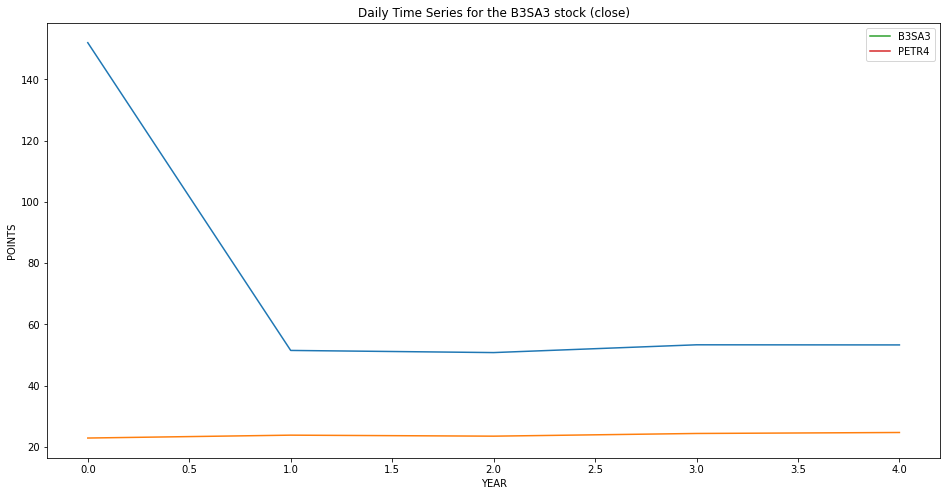

In [29]:
#! /usr/bin/python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import json
import datetime

matplotlib.rcParams['figure.figsize'] = (16, 8)

print('CARREGANDO DADOS...')

# BUSCA A CHAVE DA API ALPHA VANTAGE
ALPHAVANTAGE_API_KEY = 'QKWVUQ6IISGPG3F8'

ts = TimeSeries(key = ALPHAVANTAGE_API_KEY, output_format='pandas')

# BUSCANDO DADOS DE B3SA3...

class Stock:
  def __init__(self, stock_name):
    self.__stock_name = stock_name
    self.__data, self.__metaData = ts.get_daily(symbol = (f'{ stock_name }.SAO'), outputsize = 'compact')
    self.__symbol, self.__SymbolMetaData = ts.get_symbol_search(f'{ stock_name }.SAO')

    self.conn = sqlite3.connect('stock.db')
    self.__data.to_sql(f'{stock_name}', self.conn, if_exists='replace') 
    self.__symbol.to_sql(f'{self.__symbol}', self.conn, if_exists='replace') 
    #print(self.__symbol)
      
  def busca(self, _days):
    date = datetime.datetime.now() - datetime.timedelta(days=_days)
    date_string = date.strftime('%Y-%m-%d')    
    
    #cursos.execute(f'INSERT INTO {self.__stock_name} (date, 1. open, 2. high, 3. low, 4. close, 5. volume) VALUES(?,?,?,?,?)',())    

    query = pd.read_sql(f'SELECT * FROM { self.__stock_name } WHERE date >= "{ date_string }"', self.conn) 
    df = pd.DataFrame(query, columns=['date','4. close'])

    querySymbol = pd.read_sql(f'SELECT * FROM { self.__stock_name } WHERE date >= "{ date_string }"', self.conn) 
    dfs = pd.DataFrame(querySymbol, columns=['1. symbol', '2. name'])

    print(f'DADOS CARREGADOS DE { self.__stock_name }:')
    print(df)
    print(dfs)

    return df

b3sa3_stock = Stock('B3SA3')
petr4_stock = Stock('PETR4')

b3sa3_data = b3sa3_stock.busca(7) # BUSCA POR DADOS DA ÚLTIMA SEMANA
petr4_data = petr4_stock.busca(7) # BUSCA POR DADOS DA ÚLTIMA SEMANA

plt.title('Daily Time Series for the B3SA3 stock (close)')
plt.plot(b3sa3_data['4. close'])
plt.plot(petr4_data['4. close'])

plt.xlabel("YEAR")
plt.ylabel("POINTS")

plt.plot([], label='B3SA3')
plt.legend()

plt.plot([], label='PETR4')
plt.legend()

plt.show()

# New Section